In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
data = pd.read_csv('edlich-kmeans-A0.csv')

In [2]:
print(data.shape)
data.head()

(100, 3)


,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


In [11]:
f1 = data['V1'].values
f2 = data['V2'].values
f3 = data['V3'].values
X = np.array(list(zip(f1, f2, f3)))

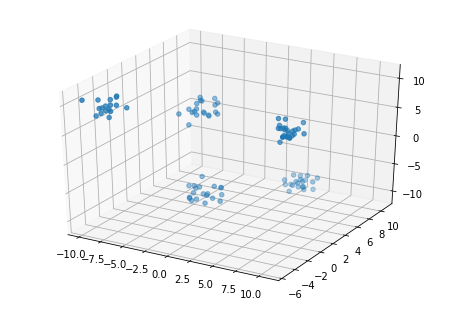

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

The graphic might suggested that 5 could be a good k but what if we can not visualize it like here. We have to try some k and look at the cost function to find the best one.

In [29]:
# Finding out the best k
for k in range (1, 11):

    kmeans_model = KMeans(n_clusters=k).fit(X)

    labels = kmeans_model.labels_

    interia = kmeans_model.inertia_
    print("k:",k, " cost:", interia) 


k: 1  cost: 10260.706784799486
k: 2  cost: 4899.629957493973
k: 3  cost: 2409.5098787388397
k: 4  cost: 1278.1820569817
k: 5  cost: 441.62328912304423
k: 6  cost: 213.7503527389633
k: 7  cost: 193.70273710209204
k: 8  cost: 177.65202320558632
k: 9  cost: 159.5411335147715
k: 10  cost: 149.4778473100547


The costs of k 1-4 are too high and the costs from 6 on doesn't decrease much anymore. That probably indicates, that there two centers in the same group. So 5 seams to be the best k.

In [30]:
# Initializing 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)

In [31]:
# Predicting the clusters
labels = kmeans.predict(X)
labels

array([0, 3, 3, 2, 3, 4, 2, 3, 1, 2, 3, 1, 2, 4, 0, 3, 1, 4, 0, 0, 3, 1,
       0, 3, 3, 2, 1, 1, 1, 4, 1, 1, 4, 4, 3, 0, 4, 0, 1, 3, 4, 4, 4, 0,
       4, 3, 2, 2, 4, 2, 2, 4, 1, 1, 2, 2, 0, 2, 3, 4, 2, 0, 2, 2, 4, 2,
       0, 0, 0, 4, 4, 2, 1, 2, 2, 1, 3, 4, 2, 1, 1, 4, 3, 0, 0, 3, 0, 0,
       0, 2, 1, 1, 1, 3, 2, 2, 1, 4, 0, 0])

In [32]:
# Getting the cluster centers
C = kmeans.cluster_centers_
C

array([[-5.10691526,  5.60179825,  3.71956936],
       [-2.40331671,  2.14752865, -8.02378894],
       [ 6.47155208,  2.70446035,  5.19967608],
       [-8.53242046, -3.55401526,  8.96857685],
       [ 3.66536804,  8.91074968, -9.06579829]])

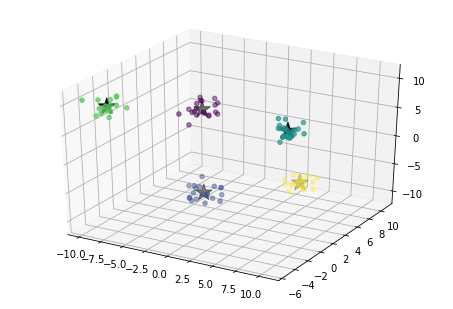

In [33]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=300)

In [34]:
# Printing the clustering vector
b = X.copy()
b = np.insert(b, 3, labels, axis=1)
sorted(b,key=lambda x: x[3])

[array([-5.34023562,  4.7472463 ,  3.82332607,  0.        ]),
 array([-5.1795348 ,  4.8463202 ,  4.24721594,  0.        ]),
 array([-4.42847662,  6.65686938,  4.00895955,  0.        ]),
 array([-4.91662608,  4.52706291,  3.45985437,  0.        ]),
 array([-5.18575661,  7.62838338,  4.34873261,  0.        ]),
 array([-4.54014196,  5.81301663,  2.73461296,  0.        ]),
 array([-5.97263413,  6.72957119,  4.24406454,  0.        ]),
 array([-3.69297625,  6.04912323,  3.02088667,  0.        ]),
 array([-4.36500448,  6.98047231,  4.1903933 ,  0.        ]),
 array([-5.21582739,  4.25852428,  3.9901113 ,  0.        ]),
 array([-5.05417849,  5.7403774 ,  3.1689619 ,  0.        ]),
 array([-4.26072049,  6.51773545,  2.9000841 ,  0.        ]),
 array([-5.45865171,  4.05727103,  1.87396836,  0.        ]),
 array([-4.85801617,  6.29138331,  2.18874797,  0.        ]),
 array([-5.27339307,  5.03545157,  5.04408956,  0.        ]),
 array([-6.16591621,  3.53160768,  3.91398691,  0.        ]),
 array([

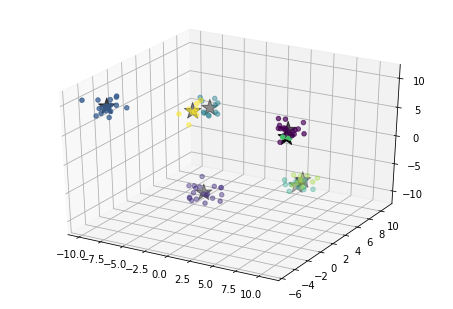

In [35]:
# What happens, if we have a large k?
kmeans = KMeans(n_clusters=8).fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=300)

Here we can see that as supposed above there are two centers in the same cluster.

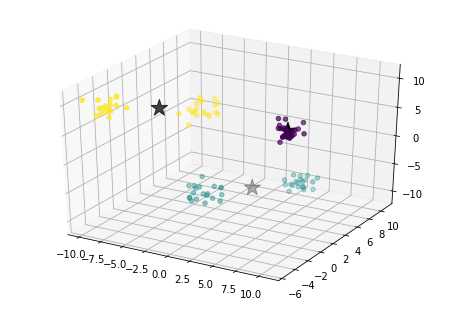

In [36]:
# ... or a smaller k?
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=300)

Here the distance to the center of the yello and the blue cluster to its points are very high.